the fitting Scale Parameter of the Weibull Probability Density Shape
a = 0.998342737313992    gamma = 4.9608454515881775


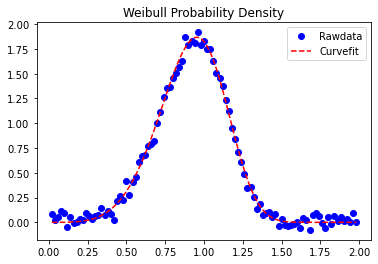

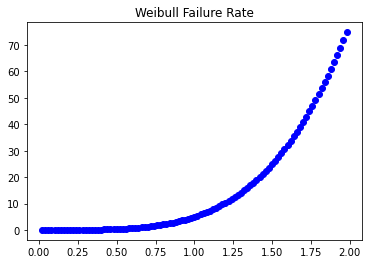

In [1]:
# Weibull Plot with randomized noise and curvefit plot

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
###########################################################################################


#Define List of functions for Weibull
#Define the Weibull probability density, https://reliabilityanalyticstoolkit.appspot.com/sample_size
def weibPDF(t,gamma,a):
    return (gamma / t) * (t / a) ** gamma * np.exp(-(t/a)**gamma) 


#Define the Weibull Failure Rate, https://reliabilityanalyticstoolkit.appspot.com/sample_size 
def weibFR(t,gamma,a):
    return (gamma / a) * (t / a) ** ( gamma - 1)
###########################################################################################


#Define Weibull parameters
#1) Weibull Scale Parameter 
a = 1
#2) Weibull Shape parameter
#if gamma < 1, likley, design issue, 'infant motality', high failure initially testing
#if gamma > 1, likely aging effect, failure increasing over time
gamma = 5
###########################################################################################


t_data = np.arange(1,100.)/50.

#Define the randomized noise with the same size as the Weibull data
np.random.seed(0)
RandomNoise = np.random.normal(loc=0.0, scale=0.05, size=np.size(t_data))


#Weibull Distribution with Randomized Noise
y_data = weibPDF(t_data, gamma, a) + RandomNoise


#Curve fitting, where popt contains the parameters of curve fitting
popt, pcov = curve_fit(weibPDF, t_data, y_data)
afit = popt.item(1)
gammafit = popt.item(0)
print('the fitting Scale Parameter of the Weibull Probability Density Shape')
print('a =', popt.item(1), '   gamma =', popt.item(0))
###########################################################################################


#Plot Weibull PDF
#Set the plot figure size
plt.figure(figsize = (6,4))
plt.title('Weibull Probability Density')
#plot the data
Rawdata, = plt.plot(t_data, y_data, 'bo')
#plot the curve fitting
Curvefit, = plt.plot(t_data, weibPDF(t_data, *popt), 'r--')
plt.legend([Rawdata, (Rawdata, Curvefit)],["Probability Density Rawdata","Curvefit"])
plt.legend([Rawdata, Curvefit],['Rawdata', 'Curvefit'])
###########################################################################################


#Plot Weibull Failure Rate
plt.figure(figsize = (6,4))
plt.title('Weibull Failure Rate')
weibullFR_Data=weibFR(t_data, gammafit, afit)
weibullFRPlot = plt.plot(t_data, weibullFR_Data, 'bo')
